# Workflow
1. Import Libraries
2. Load The Dataset
3. EDA
4. Text Preprocessing
5. Sentiment Analysis
6. Feature Extraction
7. Model Building
8. Model Selection
9. Final Model

# 1. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pip show afinn

Name: afinn
Version: 0.1
Summary: AFINN sentiment analysis
Home-page: https://github.com/fnielsen/afinn
Author: Finn Aarup Nielsen
Author-email: faan@dtu.dk
License: GPL
Location: c:\users\hemangi\appdata\roaming\python\python39\site-packages
Requires: 
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [4]:
#!pip install afinn
#!pip install nltk
#!pip install stemming
#pip install matplotlib wordcloud

In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import string # for removing punctuation
from afinn import Afinn
#nltk.download ('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import spacy
import collections
from collections import Counter
from wordcloud import WordCloud
import re
#nltk.download('averaged_perceptron_tagger')
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.util import bigrams

# Model Building
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
#from stemming.porter2 import stem

# 2. Load the Dataset

In [6]:
tweets=pd.read_excel('hotel_reviews.xlsx')
tweets

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


# 3. EDA

tweets=tweets.drop(columns='@',axis=1)
#tweets

In [7]:
tweets.isnull().sum()

Review    0
Rating    0
dtype: int64

In [8]:
tweets['Review'].duplicated().any()

False

In [9]:
tweets.loc[tweets['Rating']<=3,'TypeofRating']='Bad'
tweets.loc[tweets['Rating']>3,'TypeofRating']='Good'

In [10]:
tweets

,Review,Rating,TypeofRating
0,nice hotel expensive parking got good deal sta...,4,Good
1,ok nothing special charge diamond member hilto...,2,Bad
2,nice rooms not 4* experience hotel monaco seat...,3,Bad
3,"unique, great stay, wonderful time hotel monac...",5,Good
4,"great stay great stay, went seahawk game aweso...",5,Good
...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,Good
20487,great location price view hotel great quick pl...,4,Good
20488,"ok just looks nice modern outside, desk staff ...",2,Bad
20489,hotel theft ruined vacation hotel opened sept ...,1,Bad


In [11]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review        20491 non-null  object
 1   Rating        20491 non-null  int64 
 2   TypeofRating  20491 non-null  object
dtypes: int64(1), object(2)
memory usage: 480.4+ KB


In [12]:
tweets.columns

Index(['Review', 'Rating', 'TypeofRating'], dtype='object')

In [13]:
type_ratings=tweets['TypeofRating'].value_counts()
type_ratings

Good    15093
Bad      5398
Name: TypeofRating, dtype: int64

In [14]:
tweets.shape

(20491, 3)

In [15]:
tweets.dtypes

Review          object
Rating           int64
TypeofRating    object
dtype: object

Text(0.5, 1.0, 'Distribution of Good and Bad Ratings')

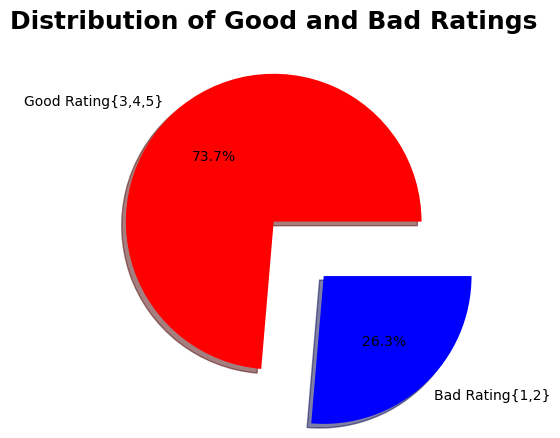

In [16]:
labels=['Good Rating{3,4,5}','Bad Rating{1,2}']
colours=['red','blue']
plt.pie(type_ratings,labels=labels,autopct='%1.1f%%',colors=colours,explode=[0,0.5],shadow=True)
plt.title('Distribution of Good and Bad Ratings',size=18,weight='bold')

In [17]:
ratings=tweets['Rating']
ratings=list(ratings)

In [18]:
counts=tweets['Rating'].value_counts()

In [19]:
counts_list=list(counts)
counts_list

[9054, 6039, 2184, 1793, 1421]

# *COUNT PLOT FOR EACH RATING*

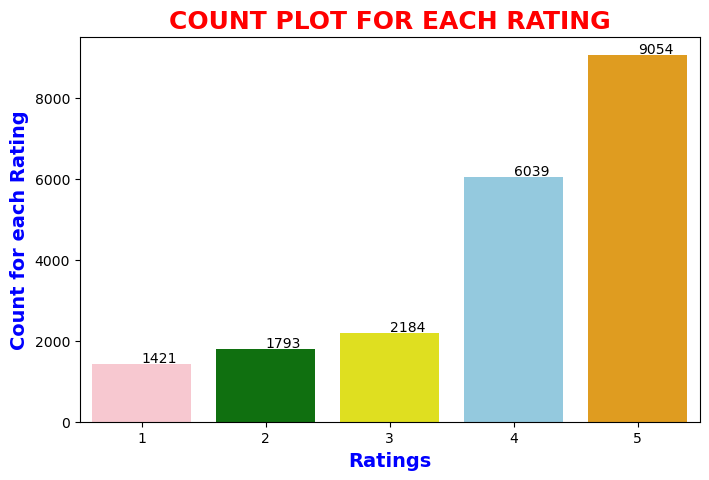

In [20]:
plt.figure(figsize=(8,5))

colors=['pink','green','yellow','skyblue','orange']
ax=sns.countplot(x=ratings,palette=colors)

counts = [ratings.count(rating) for rating in set(ratings)]
for i,value in enumerate(counts):
    ax.text(i,value+50,str(value))

plt.title('COUNT PLOT FOR EACH RATING',weight='bold',size=18,color='Red')
plt.xlabel('Ratings',weight='bold',size=14,color='blue')
plt.ylabel('Count for each Rating',weight='bold',size=14,color='blue')

plt.show()

# *PIE CHART FOR EACH RATING*

Text(0.5, 1.0, 'PIE CHART FOR EACH RATING')

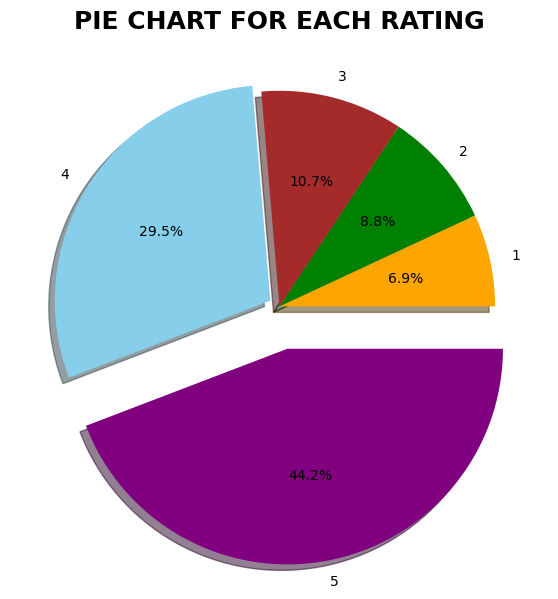

In [21]:
plt.figure(figsize=(7,7))

colors=['orange','green','brown','skyblue','purple']

plt.pie(counts,labels=[1,2,3,4,5],autopct='%1.1f%%',colors=colors,shadow=True,explode=[0,0,0,0.05,0.2])
plt.title('PIE CHART FOR EACH RATING',weight='bold',size=18)


# 4. Text Preprocessing


In [22]:
reviews=tweets['Review']

In [23]:
reviews

0        nice hotel expensive parking got good deal sta...
1        ok nothing special charge diamond member hilto...
2        nice rooms not 4* experience hotel monaco seat...
3        unique, great stay, wonderful time hotel monac...
4        great stay great stay, went seahawk game aweso...
                               ...                        
20486    best kept secret 3rd time staying charm, not 5...
20487    great location price view hotel great quick pl...
20488    ok just looks nice modern outside, desk staff ...
20489    hotel theft ruined vacation hotel opened sept ...
20490    people talking, ca n't believe excellent ratin...
Name: Review, Length: 20491, dtype: object

In [24]:
 nlp=spacy.load('en_core_web_sm')

In [25]:
def text_preprocessing(reviews):

    #convert to lower
    reviews=reviews.lower()

    #remove punctuation
    translator=str.maketrans('','',string.punctuation)
    reviews_without_punctuations=reviews.translate(translator)
    reviews_without_punctuations=re.sub(r'\d+','',reviews_without_punctuations)

    #tokenization
    tokens=word_tokenize(reviews_without_punctuations)

    #remove stop words
    stop_words=set(stopwords.words('english'))
    cleaned_tokens=[word for word in tokens if word not in stop_words]

       #def get_wordnet_pos(tag):
     #   if tag.startswith('J'):
      #      return wordnet.ADJ  # Adjective
       # elif tag.startswith('V'):
        #    return wordnet.VERB  # Verb
        #e#lif tag.startswith('N'):
         #   return wordnet.NOUN  # Noun
        #elif tag.startswith('R'):
         #   return wordnet.ADV  # Adverb
        #else:
         #   return wordnet.NOUN  # Default to noun

    lemmatizer=WordNetLemmatizer()
    lemmatized_tokens=[lemmatizer.lemmatize(token) for token in cleaned_tokens]

    cleaned_reviews=' '.join(lemmatized_tokens).strip()

    return cleaned_reviews

In [26]:
text_preprocessing('This is my not shoes')

'shoe'

In [27]:
cleaned_reviews=tweets['Review'].apply(text_preprocessing)


In [28]:
tweets['cleaned_reviews']=cleaned_reviews
#tweets

In [29]:
tweets['word_count']=tweets['cleaned_reviews'].str.split().apply(len)
tweets

,Review,Rating,TypeofRating,cleaned_reviews,word_count
0,nice hotel expensive parking got good deal sta...,4,Good,nice hotel expensive parking got good deal sta...,80
1,ok nothing special charge diamond member hilto...,2,Bad,ok nothing special charge diamond member hilto...,230
2,nice rooms not 4* experience hotel monaco seat...,3,Bad,nice room experience hotel monaco seattle good...,199
3,"unique, great stay, wonderful time hotel monac...",5,Good,unique great stay wonderful time hotel monaco ...,85
4,"great stay great stay, went seahawk game aweso...",5,Good,great stay great stay went seahawk game awesom...,178
...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,Good,best kept secret rd time staying charm star ca...,106
20487,great location price view hotel great quick pl...,4,Good,great location price view hotel great quick pl...,39
20488,"ok just looks nice modern outside, desk staff ...",2,Bad,ok look nice modern outside desk staff nt part...,61
20489,hotel theft ruined vacation hotel opened sept ...,1,Bad,hotel theft ruined vacation hotel opened sept ...,738


Text(0, 0.5, 'Word Count')

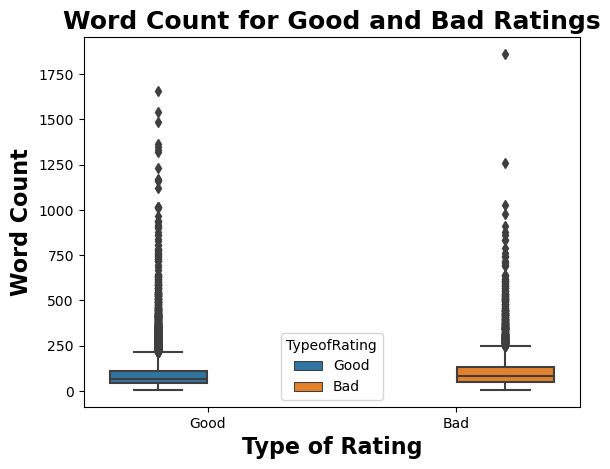

In [30]:
sns.boxplot(x=tweets['TypeofRating'],y=tweets['word_count'],hue=tweets['TypeofRating'])
plt.title('Word Count for Good and Bad Ratings',size=18,weight='bold')
plt.xlabel('Type of Rating',size=16,weight='bold')
plt.ylabel('Word Count',size=16,weight='bold')

## Calculating word count and sentiment value for each review

In [31]:
ratings_1=tweets[tweets['Rating']==1]
ratings_2=tweets[tweets['Rating']==2]
ratings_3=tweets[tweets['Rating']==3]
ratings_4=tweets[tweets['Rating']==4]
ratings_5=tweets[tweets['Rating']==5]

In [32]:
reviews_bad=tweets[tweets['TypeofRating']=='Bad']
reviews_good=tweets[tweets['TypeofRating']=='Good']

In [33]:
word_fre_ratings_bad=collections.Counter()
word_fre_ratings_bad

Counter()

In [34]:
badreviews=reviews_bad['cleaned_reviews']
badreviews

1        ok nothing special charge diamond member hilto...
2        nice room experience hotel monaco seattle good...
10       poor value stayed monaco seattle july nice hot...
13       nice hotel nice staff hotel lovely staff quite...
15       horrible customer service hotel stay february ...
                               ...                        
20484    deceptive staff deceptive desk staff claiming ...
20485    impressed unfriendly staff checked asked highe...
20488    ok look nice modern outside desk staff nt part...
20489    hotel theft ruined vacation hotel opened sept ...
20490    people talking ca nt believe excellent rating ...
Name: cleaned_reviews, Length: 5398, dtype: object

In [35]:
for review in badreviews:
    words=word_tokenize(review)
    word_fre_ratings_bad.update(words)

#top_words=word_fre_ratings1.most_common
#top_words=dict(words)
#badreviews

In [36]:
word_fre_ratings_bad

Counter({'ok': 1268,
         'nothing': 1041,
         'special': 351,
         'charge': 624,
         'diamond': 51,
         'member': 256,
         'hilton': 255,
         'decided': 378,
         'chain': 141,
         'shot': 31,
         'th': 615,
         'anniversary': 65,
         'seattle': 213,
         'start': 345,
         'booked': 1375,
         'suite': 608,
         'paid': 750,
         'extra': 604,
         'website': 368,
         'description': 45,
         'bedroom': 223,
         'bathroom': 1795,
         'standard': 608,
         'hotel': 13989,
         'room': 15723,
         'took': 953,
         'printed': 27,
         'reservation': 946,
         'desk': 1948,
         'showed': 156,
         'said': 1275,
         'thing': 1596,
         'like': 2860,
         'tv': 562,
         'couch': 52,
         'ect': 8,
         'clerk': 185,
         'told': 1752,
         'oh': 207,
         'mixed': 148,
         'kimpton': 10,
         'sorry': 138,
     

In [37]:
afinn=Afinn()

In [38]:
afinn.score('bad')

-3.0

In [39]:
sentiment_scores=[]
words=[]
frequencies=[]
for word,frequency in word_fre_ratings_bad.items():
    sentiment_score=afinn.score(word)
    sentiment_scores.append(sentiment_score)
    words.append(word)
    frequencies.append(frequency)



In [40]:
bad_review_words=pd.DataFrame({'Words':words,'Frequency':frequencies,'Sentiment_Scores':sentiment_scores})
bad_review_words.sort_values(by='Sentiment_Scores')[:20]

,Words,Frequency,Sentiment_Scores
22104,cock,2,-5.0
14115,fraud,8,-4.0
3780,torture,7,-4.0
32534,raped,1,-4.0
8328,pissed,16,-4.0
10261,ass,1,-4.0
29394,piss,1,-4.0
7931,wtf,1,-4.0
27937,tortured,1,-4.0
8709,fraudulent,4,-4.0


In [41]:
bad_reviews_word_cloud=bad_review_words[bad_review_words['Sentiment_Scores']<0]
bad_reviews_word_cloud=bad_reviews_word_cloud.sort_values(by='Frequency',ascending=False)[:30]
bad_reviews_word_cloud

,Words,Frequency,Sentiment_Scores
420,problem,1546,-2.0
510,bad,1476,-3.0
583,lobby,1058,-2.0
880,pay,920,-1.0
319,worst,599,-3.0
788,dirty,599,-2.0
282,poor,595,-2.0
66,hard,587,-1.0
308,rude,524,-2.0
296,disappointed,513,-2.0


Text(0, 0.5, '20 Negative words')

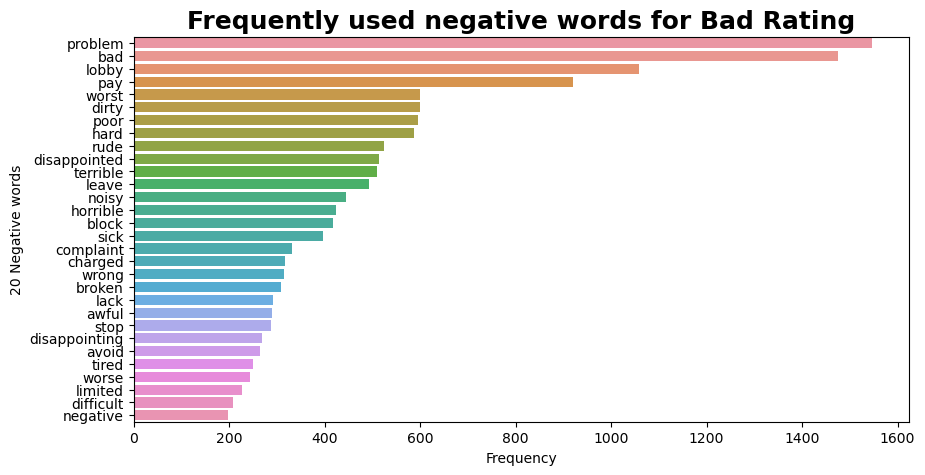

In [42]:

plt.figure(figsize=(10,5))
#plt.gca().set_facecolor('lightgreen')
sns.barplot(x=bad_reviews_word_cloud['Frequency'],y=bad_reviews_word_cloud['Words'])
plt.title('Frequently used negative words for Bad Rating',size=18,weight='bold')
plt.xlabel('Frequency')
plt.ylabel('20 Negative words')

<AxesSubplot:xlabel='Frequency', ylabel='Words'>

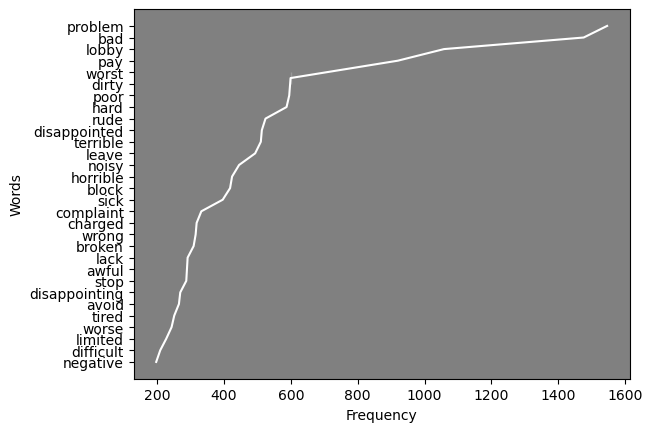

In [43]:
plt.gca().set_facecolor('grey')
sns.lineplot(x='Frequency',y='Words',data=bad_reviews_word_cloud,color='white')

In [44]:
wordcloud_data_bad = dict(zip(bad_reviews_word_cloud['Words'], bad_reviews_word_cloud['Frequency']))

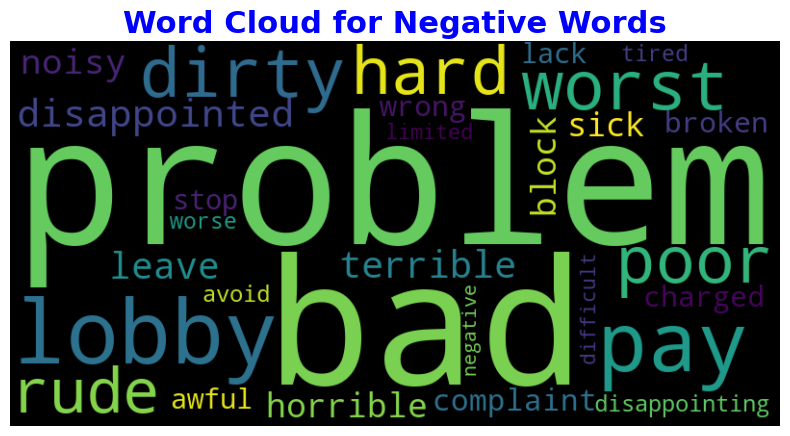

In [45]:
# Create the WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(wordcloud_data_bad)

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.title('Word Cloud for Negative Words',size='22',weight='bold',color='Blue')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



In [46]:
reviews_good=tweets[tweets['Rating'].isin([4,5])].copy()
reviews_good

,Review,Rating,TypeofRating,cleaned_reviews,word_count
0,nice hotel expensive parking got good deal sta...,4,Good,nice hotel expensive parking got good deal sta...,80
3,"unique, great stay, wonderful time hotel monac...",5,Good,unique great stay wonderful time hotel monaco ...,85
4,"great stay great stay, went seahawk game aweso...",5,Good,great stay great stay went seahawk game awesom...,178
5,love monaco staff husband stayed hotel crazy w...,5,Good,love monaco staff husband stayed hotel crazy w...,129
6,"cozy stay rainy city, husband spent 7 nights m...",5,Good,cozy stay rainy city husband spent night monac...,96
...,...,...,...,...,...
20480,great play stay stay loyal inn package deal ha...,5,Good,great play stay stay loyal inn package deal ha...,32
20482,great choice wife chose best western quite bit...,5,Good,great choice wife chose best western quite bit...,104
20483,good bed clean convenient just night happy sta...,4,Good,good bed clean convenient night happy stay hot...,58
20486,"best kept secret 3rd time staying charm, not 5...",5,Good,best kept secret rd time staying charm star ca...,106


In [47]:
good_reviews=reviews_good['cleaned_reviews']
good_reviews

0        nice hotel expensive parking got good deal sta...
3        unique great stay wonderful time hotel monaco ...
4        great stay great stay went seahawk game awesom...
5        love monaco staff husband stayed hotel crazy w...
6        cozy stay rainy city husband spent night monac...
                               ...                        
20480    great play stay stay loyal inn package deal ha...
20482    great choice wife chose best western quite bit...
20483    good bed clean convenient night happy stay hot...
20486    best kept secret rd time staying charm star ca...
20487    great location price view hotel great quick pl...
Name: cleaned_reviews, Length: 15093, dtype: object

In [48]:
good_word_fre_counter=collections.Counter()

In [49]:


for review in good_reviews:
    word=word_tokenize(review)
    good_word_fre_counter.update(word)


good_word_fre_counter

Counter({'nice': 9243,
         'hotel': 38905,
         'expensive': 1363,
         'parking': 1036,
         'got': 3902,
         'good': 12472,
         'deal': 1103,
         'stay': 11293,
         'anniversary': 348,
         'arrived': 1834,
         'late': 1058,
         'evening': 1578,
         'took': 1988,
         'advice': 389,
         'previous': 507,
         'review': 3434,
         'valet': 332,
         'check': 1846,
         'quick': 721,
         'easy': 1829,
         'little': 4732,
         'disappointed': 694,
         'nonexistent': 28,
         'view': 4650,
         'room': 30625,
         'clean': 7307,
         'size': 1507,
         'bed': 5038,
         'comfortable': 3815,
         'woke': 65,
         'stiff': 18,
         'neck': 21,
         'high': 1218,
         'pillow': 614,
         'soundproof': 38,
         'like': 5323,
         'heard': 524,
         'music': 613,
         'night': 9617,
         'morning': 2273,
         'loud': 265,
  

In [50]:
good_words=[]
sentiment_score_good=[]
frequency_good_words=[]

for word,frequency in good_word_fre_counter.items():
    sentiment_score=afinn.score(word)
    sentiment_score_good.append(sentiment_score)
    good_words.append(word)
    frequency_good_words.append(frequency)

In [51]:
df_good_reviews=pd.DataFrame({'Words':good_words,'Frequency':frequency_good_words,'Sentiment_Score':sentiment_score_good})
df_good_reviews_sentiment=df_good_reviews.sort_values(by='Sentiment_Score',ascending=False)[:30]
df_good_reviews_sentiment

,Words,Frequency,Sentiment_Score
2286,superb,678,5.0
2807,breathtaking,154,5.0
4662,thrilled,85,5.0
552,outstanding,530,5.0
30679,hurrah,1,5.0
43624,triumphant,1,4.0
9861,terrifically,4,4.0
1799,winner,51,4.0
39030,exuberant,1,4.0
2523,wonderfully,113,4.0


Text(0, 0.5, '20 Good words')

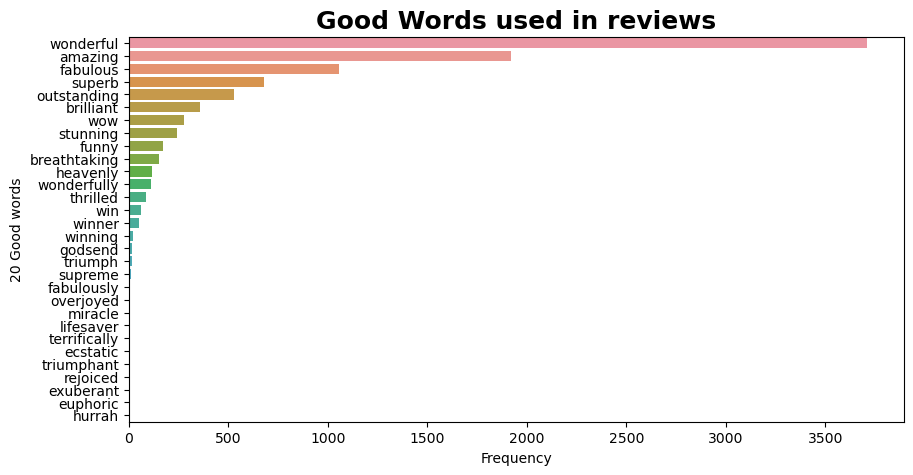

In [52]:
plt.figure(figsize=(10,5))
#plt.gca().set_facecolor('lightgreen')
sns.barplot(x=df_good_reviews_sentiment['Frequency'],y=df_good_reviews_sentiment['Words'],order=df_good_reviews_sentiment.sort_values(by='Frequency',ascending=False)['Words'])
plt.title('Good Words used in reviews',size=18,weight='bold')
plt.xlabel('Frequency')
plt.ylabel('20 Good words')

In [53]:
wordcloud_data_good = dict(zip(df_good_reviews_sentiment['Words'], df_good_reviews_sentiment['Frequency']))

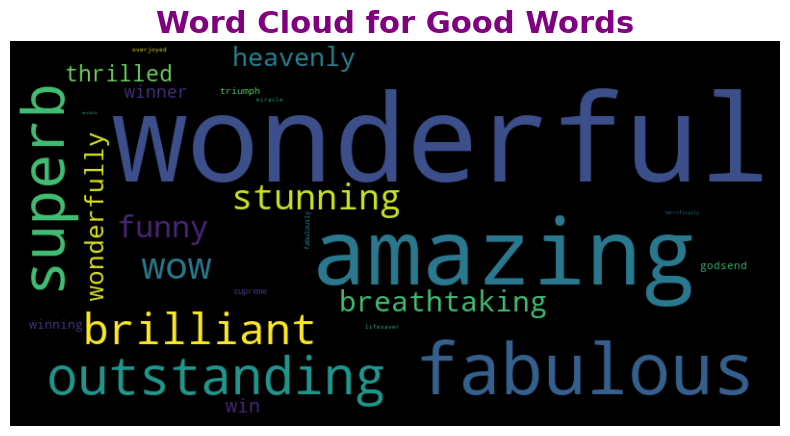

In [54]:
# Create the WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(wordcloud_data_good)

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.title('Word Cloud for Good Words',size='22',weight='bold',color='Purple')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [55]:
#df_good_reviews=pd.DataFrame({'Words':good_words,'Frequency':frequency_good_words,'Sentiment_Score':sentiment_score_good})
df_good_reviews_frequency=df_good_reviews.sort_values(by='Frequency',ascending=False)[:20]
df_good_reviews_frequency

,Words,Frequency,Sentiment_Score
1,hotel,38905,0.0
24,room,30625,0.0
62,great,18113,3.0
107,staff,12537,0.0
5,good,12472,3.0
98,nt,12379,0.0
7,stay,11293,0.0
38,night,9617,0.0
0,nice,9243,3.0
71,time,8911,0.0


Text(0, 0.5, 'Words')

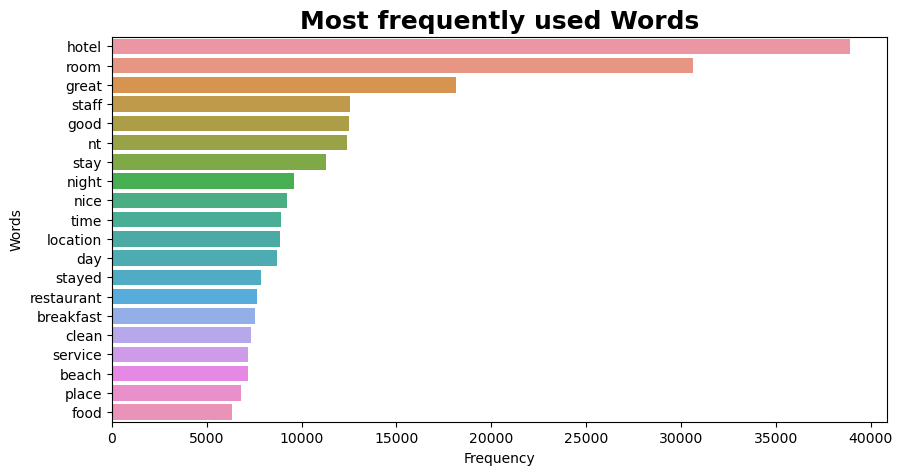

In [56]:
plt.figure(figsize=(10,5))
#plt.gca().set_facecolor('lightgreen')
sns.barplot(x=df_good_reviews_frequency['Frequency'],y=df_good_reviews_frequency['Words'],order=df_good_reviews_frequency.sort_values(by='Frequency',ascending=False)['Words'])
plt.title('Most frequently used Words',size=18,weight='bold')
plt.xlabel('Frequency')
plt.ylabel('Words')

In [57]:
wordcloud_data_fre_words = dict(zip(df_good_reviews_frequency['Words'], df_good_reviews_frequency['Frequency']))

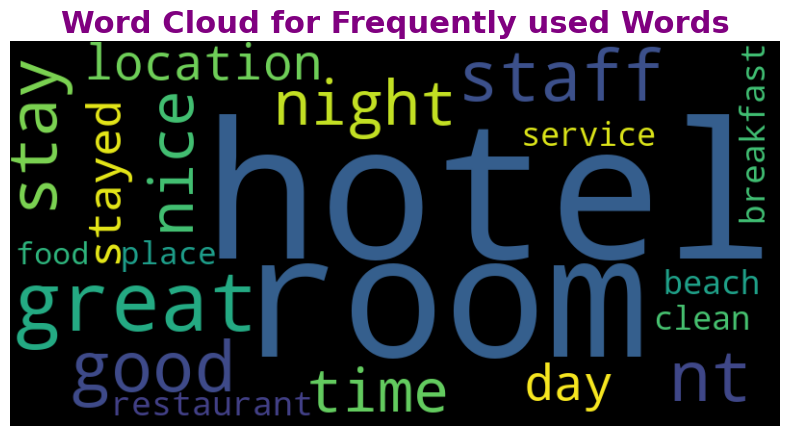

In [58]:
# Create the WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(wordcloud_data_fre_words)

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.title('Word Cloud for Frequently used Words',size='22',weight='bold',color='Purple')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Vadar Sentiment Analysis

In [59]:
tweets

,Review,Rating,TypeofRating,cleaned_reviews,word_count
0,nice hotel expensive parking got good deal sta...,4,Good,nice hotel expensive parking got good deal sta...,80
1,ok nothing special charge diamond member hilto...,2,Bad,ok nothing special charge diamond member hilto...,230
2,nice rooms not 4* experience hotel monaco seat...,3,Bad,nice room experience hotel monaco seattle good...,199
3,"unique, great stay, wonderful time hotel monac...",5,Good,unique great stay wonderful time hotel monaco ...,85
4,"great stay great stay, went seahawk game aweso...",5,Good,great stay great stay went seahawk game awesom...,178
...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,Good,best kept secret rd time staying charm star ca...,106
20487,great location price view hotel great quick pl...,4,Good,great location price view hotel great quick pl...,39
20488,"ok just looks nice modern outside, desk staff ...",2,Bad,ok look nice modern outside desk staff nt part...,61
20489,hotel theft ruined vacation hotel opened sept ...,1,Bad,hotel theft ruined vacation hotel opened sept ...,738


In [60]:
vsa=SentimentIntensityAnalyzer()

In [61]:
def get_sentiment_scores(review):
    sentiment_score=vsa.polarity_scores(review)
    return sentiment_score

In [62]:
vadar_sentiment_scores=tweets['cleaned_reviews'].apply(get_sentiment_scores)

In [63]:
#vadar_sentiment_scores=pd.Series(vadar_sentiment_scores)
#pd.set_option('display.max_rows',None)
vadar_sentiment_scores

0        {'neg': 0.056, 'neu': 0.617, 'pos': 0.327, 'co...
1        {'neg': 0.053, 'neu': 0.699, 'pos': 0.248, 'co...
2        {'neg': 0.059, 'neu': 0.696, 'pos': 0.245, 'co...
3        {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'comp...
4        {'neg': 0.067, 'neu': 0.627, 'pos': 0.306, 'co...
                               ...                        
20486    {'neg': 0.053, 'neu': 0.642, 'pos': 0.305, 'co...
20487    {'neg': 0.0, 'neu': 0.57, 'pos': 0.43, 'compou...
20488    {'neg': 0.065, 'neu': 0.737, 'pos': 0.198, 'co...
20489    {'neg': 0.144, 'neu': 0.66, 'pos': 0.196, 'com...
20490    {'neg': 0.085, 'neu': 0.64, 'pos': 0.275, 'com...
Name: cleaned_reviews, Length: 20491, dtype: object

In [64]:
#vadar_sentiment_scores[]

In [65]:
compound_scores=vadar_sentiment_scores.apply(lambda x: x.get('compound'))
len(compound_scores)


20491

In [66]:
def sentiment_values(score):
    if score > 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [67]:
sentiment_values=compound_scores.apply(sentiment_values)
sentiment_values

0        Positive
1        Positive
2        Positive
3        Positive
4        Positive
           ...   
20486    Positive
20487    Positive
20488    Positive
20489    Positive
20490    Positive
Name: cleaned_reviews, Length: 20491, dtype: object

In [68]:
tweets['vadar_sentiment']=sentiment_values
tweets

,Review,Rating,TypeofRating,cleaned_reviews,word_count,vadar_sentiment
0,nice hotel expensive parking got good deal sta...,4,Good,nice hotel expensive parking got good deal sta...,80,Positive
1,ok nothing special charge diamond member hilto...,2,Bad,ok nothing special charge diamond member hilto...,230,Positive
2,nice rooms not 4* experience hotel monaco seat...,3,Bad,nice room experience hotel monaco seattle good...,199,Positive
3,"unique, great stay, wonderful time hotel monac...",5,Good,unique great stay wonderful time hotel monaco ...,85,Positive
4,"great stay great stay, went seahawk game aweso...",5,Good,great stay great stay went seahawk game awesom...,178,Positive
...,...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,Good,best kept secret rd time staying charm star ca...,106,Positive
20487,great location price view hotel great quick pl...,4,Good,great location price view hotel great quick pl...,39,Positive
20488,"ok just looks nice modern outside, desk staff ...",2,Bad,ok look nice modern outside desk staff nt part...,61,Positive
20489,hotel theft ruined vacation hotel opened sept ...,1,Bad,hotel theft ruined vacation hotel opened sept ...,738,Positive


In [69]:
sentence_count=tweets['vadar_sentiment'].value_counts()

In [70]:
sentence_count=sentence_count.values
sentence_count

array([19380,  1044,    67], dtype=int64)

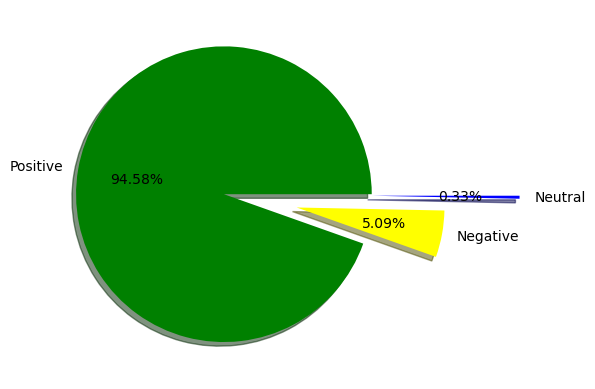

In [71]:
labels=['Positive','Negative','Neutral']
colors=['green','yellow','blue']
plt.pie(sentence_count,shadow=True,autopct='%0.2f%%',labels=labels,colors=colors,explode=[0,0.5,1])
plt.show()

## All cleaned reviews words

In [72]:
positive_reviews=tweets['cleaned_reviews'][tweets['vadar_sentiment']=='Positive']
positive_reviews

0        nice hotel expensive parking got good deal sta...
1        ok nothing special charge diamond member hilto...
2        nice room experience hotel monaco seattle good...
3        unique great stay wonderful time hotel monaco ...
4        great stay great stay went seahawk game awesom...
                               ...                        
20486    best kept secret rd time staying charm star ca...
20487    great location price view hotel great quick pl...
20488    ok look nice modern outside desk staff nt part...
20489    hotel theft ruined vacation hotel opened sept ...
20490    people talking ca nt believe excellent rating ...
Name: cleaned_reviews, Length: 19380, dtype: object

In [73]:
list(tweets['Review'][tweets['vadar_sentiment']=='Neutral'].values)

["checked early wo n't stay room dirty checked food substances carpet, late night let, got evening no maid service n't provide maid service stay week, furnishings cheap room small simply not worth price, motel 6 masquerading pricier simply not worth,  ",
 "terrible driveway/valet experience stay lot hotels upper-end, doubletree major service/management problems, dropped wife left return car sea-tac airport, total pieces luggage, zero help valet, indide hotel trying checkin area not single bellhop moved muscle help, bothered rotator cuff got no help getting bags hotel hotel, called cellphone told miserable service, initially arrived hotel lazy woman gated entrance hotel barely rouse inside booth bothered question dropping bags, miserable attitude, met ones like, later parking outside car attendants contracted company, service awful wo n't, clearly inside service bad outside, wife normally mild retired ceo major institution livid, big airport hotel no food service prior 6am room service 

In [74]:
positive_reviews_word_frequency=collections.Counter()

In [75]:
for review in positive_reviews:
    word=word_tokenize(review)
    positive_reviews_word_frequency.update(word)


In [76]:
positive_reviews_word_frequency

Counter({'nice': 12211,
         'hotel': 50200,
         'expensive': 1857,
         'parking': 1506,
         'got': 5822,
         'good': 16765,
         'deal': 1518,
         'stay': 14512,
         'anniversary': 408,
         'arrived': 2645,
         'late': 1476,
         'evening': 2021,
         'took': 2790,
         'advice': 485,
         'previous': 688,
         'review': 4517,
         'valet': 465,
         'check': 2792,
         'quick': 884,
         'easy': 2118,
         'little': 6083,
         'disappointed': 1087,
         'nonexistent': 58,
         'view': 5746,
         'room': 43573,
         'clean': 9194,
         'size': 1949,
         'bed': 7098,
         'comfortable': 4387,
         'woke': 109,
         'stiff': 26,
         'neck': 32,
         'high': 1642,
         'pillow': 848,
         'soundproof': 46,
         'like': 7856,
         'heard': 766,
         'music': 839,
         'night': 13333,
         'morning': 3154,
         'loud': 552

In [77]:
positive_words=[]
positive_scores=[]
positive_frequency=[]

for word,frequency in positive_reviews_word_frequency.items():
    positive_score=afinn.score(word)
    positive_scores.append(positive_score)
    positive_frequency.append(frequency)
    positive_words.append(word)


In [78]:
df_positive_words=pd.DataFrame({'Positive_Words':positive_words,'Frequency':positive_frequency,'Sentiment_Score':positive_scores})
df_positive_words=df_positive_words[df_positive_words['Sentiment_Score']>0]
df_positive_words=df_positive_words.sort_values(by='Sentiment_Score',ascending=False)
df_positive_top30=df_positive_words[:30]
df_positive_top30

,Positive_Words,Frequency,Sentiment_Score
3316,superb,720,5.0
902,outstanding,581,5.0
2895,breathtaking,175,5.0
3159,thrilled,99,5.0
38071,hurrah,1,5.0
326,wonderful,4025,4.0
624,fabulous,1138,4.0
375,awesome,919,4.0
11080,lifesaver,7,4.0
386,funny,233,4.0


Text(0, 0.5, '30 Positive words')

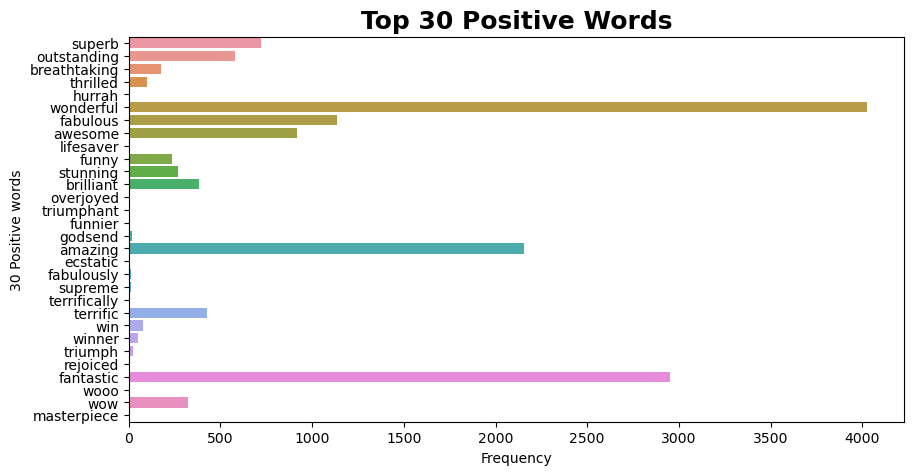

In [79]:
plt.figure(figsize=(10,5))
#plt.gca().set_facecolor('lightgreen')
sns.barplot(x=df_positive_top30['Frequency'],y=df_positive_top30['Positive_Words'])
plt.title('Top 30 Positive Words',size=18,weight='bold')
plt.xlabel('Frequency')
plt.ylabel('30 Positive words')

In [80]:
word_cloud_positive_fre=dict(zip(df_positive_top30['Positive_Words'],df_positive_top30['Frequency']))
word_cloud_positive_fre

{'superb': 720,
 'outstanding': 581,
 'breathtaking': 175,
 'thrilled': 99,
 'hurrah': 1,
 'wonderful': 4025,
 'fabulous': 1138,
 'awesome': 919,
 'lifesaver': 7,
 'funny': 233,
 'stunning': 271,
 'brilliant': 383,
 'overjoyed': 5,
 'triumphant': 1,
 'funnier': 2,
 'godsend': 18,
 'amazing': 2153,
 'ecstatic': 5,
 'fabulously': 10,
 'supreme': 14,
 'terrifically': 4,
 'terrific': 425,
 'win': 75,
 'winner': 53,
 'triumph': 21,
 'rejoiced': 1,
 'fantastic': 2950,
 'wooo': 1,
 'wow': 322,
 'masterpiece': 3}

In [81]:
positive_wordcloud=WordCloud(width=800,height=400,background_color='black').generate_from_frequencies(word_cloud_positive_fre)

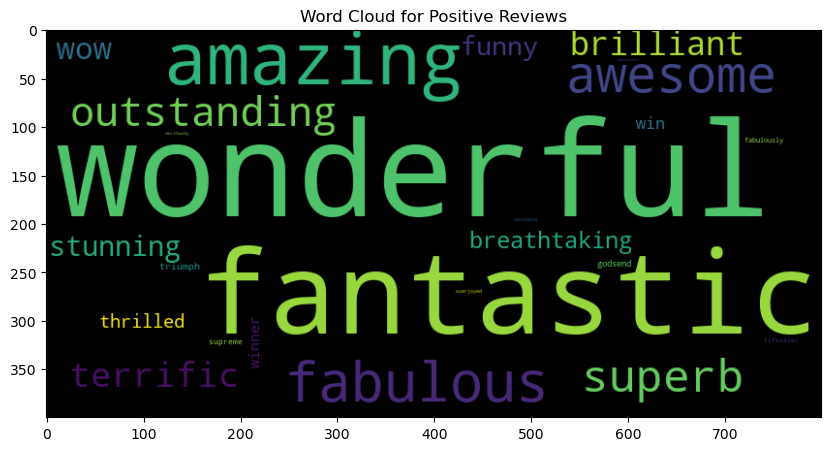

In [82]:
plt.figure(figsize=(10,6))
plt.title('Word Cloud for Positive Reviews')
plt.imshow(positive_wordcloud,interpolation='bilinear')
#plt.axis('off')
plt.show()

##  Negative Reviews

In [83]:
negative_reviews=tweets['cleaned_reviews'][tweets['vadar_sentiment']=='Negative']
negative_reviews

32       noise airconditionera standard arranged stay t...
42       warwick bad good review warwick shock staff qu...
44       austin power decor familiar hotel seattlewhere...
65       hated inn terrible roomservice horrible staff ...
76       stay clear internet reservation friday rang ho...
                               ...                        
20353    tthe worst hotel experienced read bad review d...
20360    disgusting stayed night glad room looked cute ...
20421    worst sleep hip tooooo hip nite club building ...
20465    stay hotel brought group february worst hotel ...
20485    impressed unfriendly staff checked asked highe...
Name: cleaned_reviews, Length: 1044, dtype: object

In [84]:
negative_word_fre_counter=collections.Counter()

In [85]:
for review in negative_reviews:
    words_tokens=word_tokenize(review)
    negative_word_fre_counter.update(words_tokens)


In [86]:
negative_words=[]
negative_frequency=[]
negative_scores=[]

for word,frequency in negative_word_fre_counter.items():
    negative_words.append(word)
    negative_frequency.append(frequency)
    negative_score=afinn.score(word)
    negative_scores.append(negative_score)

In [87]:
df_negative_words=pd.DataFrame({'Negative_Words':negative_words,'Negative_Frequencies':negative_frequency,'Negative_Scores':negative_scores})
df_negative_words=df_negative_words[df_negative_words['Negative_Scores']<0]
df_negative_words_top30=df_negative_words.sort_values(by='Negative_Frequencies',ascending=False)[:30]
df_negative_words_top30

,Negative_Words,Negative_Frequencies,Negative_Scores
62,bad,395,-3.0
137,problem,330,-2.0
69,dirty,265,-2.0
186,worst,260,-3.0
112,terrible,193,-3.0
67,rude,189,-2.0
787,poor,187,-2.0
114,horrible,176,-3.0
327,pay,174,-1.0
579,lobby,148,-2.0


Text(0, 0.5, '30 Negative words')

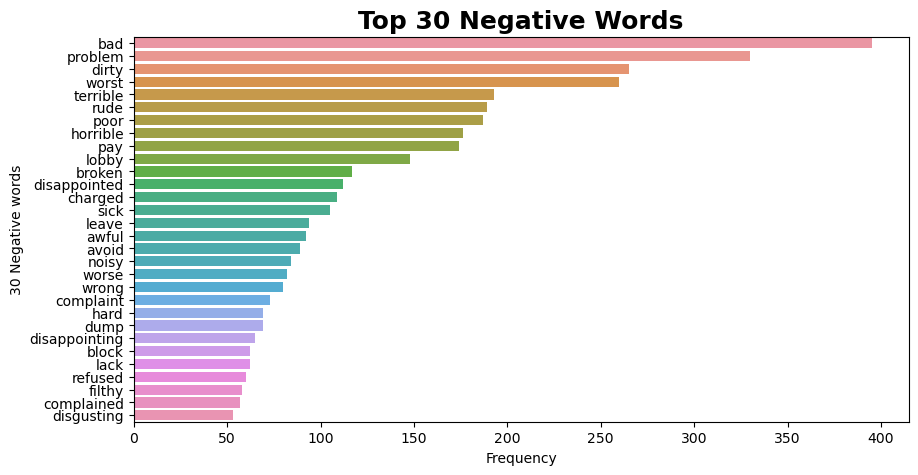

In [88]:
plt.figure(figsize=(10,5))
#plt.gca().set_facecolor('lightgreen')
sns.barplot(x=df_negative_words_top30['Negative_Frequencies'],y=df_negative_words_top30['Negative_Words'])
plt.title('Top 30 Negative Words',size=18,weight='bold')
plt.xlabel('Frequency')
plt.ylabel('30 Negative words')

In [89]:
word_cloud_negative_fre=dict(zip(df_negative_words_top30['Negative_Words'],df_negative_words_top30['Negative_Frequencies']))
word_cloud_negative_fre

{'bad': 395,
 'problem': 330,
 'dirty': 265,
 'worst': 260,
 'terrible': 193,
 'rude': 189,
 'poor': 187,
 'horrible': 176,
 'pay': 174,
 'lobby': 148,
 'broken': 117,
 'disappointed': 112,
 'charged': 109,
 'sick': 105,
 'leave': 94,
 'awful': 92,
 'avoid': 89,
 'noisy': 84,
 'worse': 82,
 'wrong': 80,
 'complaint': 73,
 'hard': 69,
 'dump': 69,
 'disappointing': 65,
 'block': 62,
 'lack': 62,
 'refused': 60,
 'filthy': 58,
 'complained': 57,
 'disgusting': 53}

In [90]:
negative_wordcloud=WordCloud(width=800,height=400,background_color='black').generate_from_frequencies(word_cloud_negative_fre)

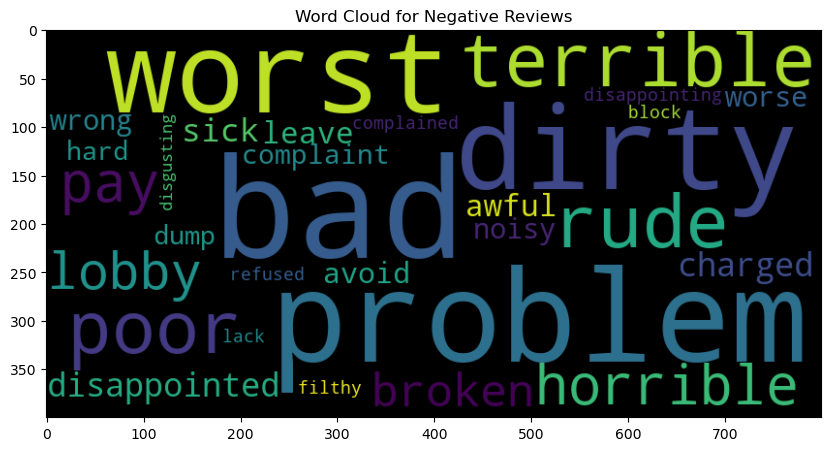

In [91]:
plt.figure(figsize=(10,6))
plt.title('Word Cloud for Negative Reviews')
plt.imshow(negative_wordcloud,interpolation='bilinear')
#plt.axis('off')
plt.show()

## Neutral Reviews

In [92]:
neutral_reviews=tweets['cleaned_reviews'][tweets['vadar_sentiment']=='Neutral']
neutral_reviews

191      checked early wo nt stay room dirty checked fo...
463      terrible drivewayvalet experience stay lot hot...
486      wrong hotel looked room resrvied smeeled vomit...
619      simple perfect stayed time disappointed room e...
1000     shame hotel wasnt good restaurant arrived clif...
                               ...                        
19245    wo nt stay paid wifi nt signal room work lobby...
19359    taken ride asia expo instead airport wanted ai...
19640    good hotel dreadful service arrived hotel feel...
20405    location location location stayed deluxe room ...
20467    returning la concha nightmare surprising hotel...
Name: cleaned_reviews, Length: 67, dtype: object

In [93]:
neutral_word_fre_counter=collections.Counter()

In [94]:
for review in neutral_reviews:
    words_tokens=word_tokenize(review)
    neutral_word_fre_counter.update(words_tokens)

neutral_word_fre_counter

Counter({'checked': 6,
         'early': 12,
         'wo': 5,
         'nt': 50,
         'stay': 55,
         'room': 141,
         'dirty': 6,
         'food': 21,
         'substance': 1,
         'carpet': 3,
         'late': 8,
         'night': 30,
         'let': 6,
         'got': 23,
         'evening': 5,
         'maid': 3,
         'service': 24,
         'provide': 3,
         'week': 7,
         'furnishing': 1,
         'cheap': 1,
         'small': 13,
         'simply': 6,
         'worth': 5,
         'price': 7,
         'motel': 2,
         'masquerading': 1,
         'pricier': 1,
         'terrible': 6,
         'drivewayvalet': 1,
         'experience': 7,
         'lot': 5,
         'hotel': 120,
         'upperend': 1,
         'doubletree': 1,
         'major': 6,
         'servicemanagement': 1,
         'problem': 16,
         'dropped': 1,
         'wife': 5,
         'left': 6,
         'return': 3,
         'car': 4,
         'seatac': 2,
         'airpo

In [95]:
neutral_words=[]
neutral_frequency=[]
neutral_scores=[]

for word,frequency in neutral_word_fre_counter.items():
    neutral_words.append(word)
    neutral_frequency.append(frequency)
    neutral_score=afinn.score(word)
    neutral_scores.append(neutral_score)

In [96]:
df_neutral_words=pd.DataFrame({'Neutral_words':neutral_words,'Neutral_Frequencies':neutral_frequency,'Neutral_Scores':neutral_scores})
df_neutral_words=df_neutral_words[df_neutral_words['Neutral_Scores']==0]
df_neutral_words_top30=df_neutral_words.sort_values(by='Neutral_Frequencies',ascending=False)[:30]
df_neutral_words_top30

,Neutral_words,Neutral_Frequencies,Neutral_Scores
5,room,141,0.0
32,hotel,120,0.0
4,stay,55,0.0
3,nt,50,0.0
223,day,35,0.0
152,time,34,0.0
11,night,30,0.0
66,told,25,0.0
16,service,24,0.0
175,staff,23,0.0


Text(0, 0.5, '30 Neutral words')

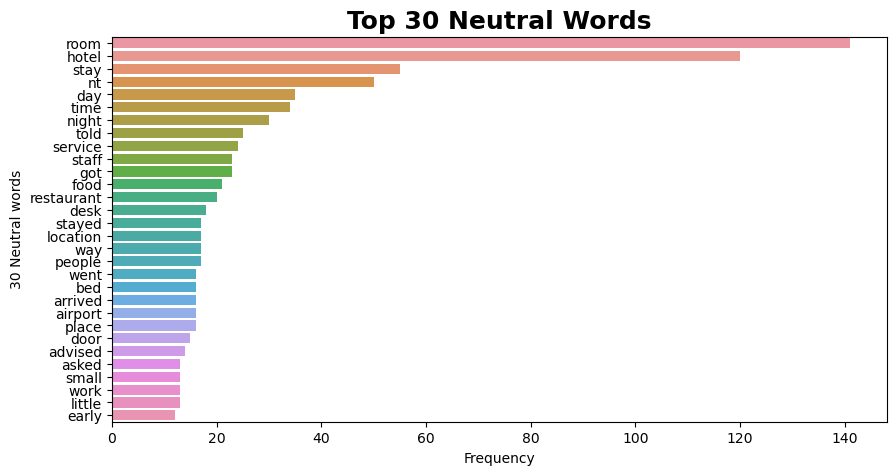

In [97]:
plt.figure(figsize=(10,5))
#plt.gca().set_facecolor('lightgreen')
sns.barplot(x=df_neutral_words_top30['Neutral_Frequencies'],y=df_neutral_words_top30['Neutral_words'])
plt.title('Top 30 Neutral Words',size=18,weight='bold')
plt.xlabel('Frequency')
plt.ylabel('30 Neutral words')

In [98]:
word_cloud_neutral_fre=dict(zip(df_neutral_words_top30['Neutral_words'],df_neutral_words_top30['Neutral_Frequencies']))
word_cloud_neutral_fre

{'room': 141,
 'hotel': 120,
 'stay': 55,
 'nt': 50,
 'day': 35,
 'time': 34,
 'night': 30,
 'told': 25,
 'service': 24,
 'staff': 23,
 'got': 23,
 'food': 21,
 'restaurant': 20,
 'desk': 18,
 'stayed': 17,
 'location': 17,
 'way': 17,
 'people': 17,
 'went': 16,
 'bed': 16,
 'arrived': 16,
 'airport': 16,
 'place': 16,
 'door': 15,
 'advised': 14,
 'asked': 13,
 'small': 13,
 'work': 13,
 'little': 13,
 'early': 12}

In [99]:
neutral_wordcloud=WordCloud(width=800,height=400,background_color='black').generate_from_frequencies(word_cloud_neutral_fre)

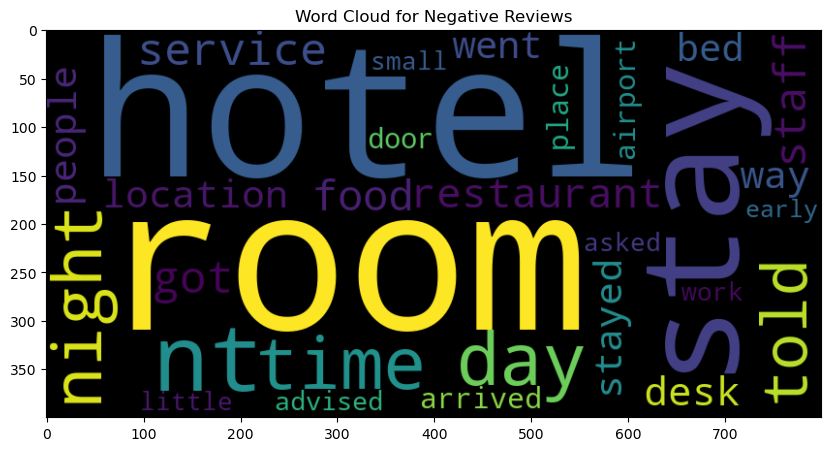

In [100]:
plt.figure(figsize=(10,6))
plt.title('Word Cloud for Negative Reviews')
plt.imshow(neutral_wordcloud,interpolation='bilinear')
#plt.axis('off')
plt.show()

# 6. Feature Extraction

## Bag of Words

In [101]:
vectorizer=CountVectorizer(max_features=3000)
X=vectorizer.fit_transform(tweets['cleaned_reviews'])
X

<20491x3000 sparse matrix of type '<class 'numpy.int64'>'
	with 1352753 stored elements in Compressed Sparse Row format>

In [102]:
vocabulary_data=vectorizer.vocabulary_

In [103]:
df_bow=pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names_out())
df_bow

,able,absolute,absolutely,ac,accept,acceptable,accepted,access,accessible,accommodate,...,yogurt,york,young,younger,youçéèe,yr,yummy,zero,zone,zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20486,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
20487,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20488,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20489,0,0,2,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [104]:
df_bow.columns

Index(['able', 'absolute', 'absolutely', 'ac', 'accept', 'acceptable',
       'accepted', 'access', 'accessible', 'accommodate',
       ...
       'yogurt', 'york', 'young', 'younger', 'youçéèe', 'yr', 'yummy', 'zero',
       'zone', 'zoo'],
      dtype='object', length=3000)

## TF IDF Vectorizer

In [105]:
tfidf_vectorizer=TfidfVectorizer(norm='l2',max_features=5000,ngram_range=(1,2),analyzer='word',stop_words='english')

In [106]:
tfidf_matrix=tfidf_vectorizer.fit_transform(tweets['cleaned_reviews'])

In [107]:
df_tfidf=pd.DataFrame(tfidf_matrix.toarray(),columns=tfidf_vectorizer.get_feature_names_out())
df_tfidf

,able,able check,able walk,absolute,absolutely,absolutely beautiful,absolutely loved,absolutely wonderful,ac,accept,...,young child,younger,youçéèe,youçéêl,yr,yr old,yummy,zero,zone,zoo
0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.00000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.00000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.06897,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.00000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.00000,0.089211,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20486,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.00000,0.000000,...,0.0,0.135555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20487,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.00000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20488,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.00000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20489,0.0,0.0,0.0,0.0,0.04519,0.036521,0.0,0.0,0.00000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [108]:
import pickle 
pickle.dump(df_tfidf, open('df_matrix.pkl', 'wb'))

In [109]:
# Label Encoding of Vadar Sentiment Column
# Negative:0,Neutral:1,Positive:2
encoder=LabelEncoder()
tweets['vadar_sentiment_transform']=encoder.fit_transform(tweets['vadar_sentiment'])

tweets

,Review,Rating,TypeofRating,cleaned_reviews,word_count,vadar_sentiment,vadar_sentiment_transform
0,nice hotel expensive parking got good deal sta...,4,Good,nice hotel expensive parking got good deal sta...,80,Positive,2
1,ok nothing special charge diamond member hilto...,2,Bad,ok nothing special charge diamond member hilto...,230,Positive,2
2,nice rooms not 4* experience hotel monaco seat...,3,Bad,nice room experience hotel monaco seattle good...,199,Positive,2
3,"unique, great stay, wonderful time hotel monac...",5,Good,unique great stay wonderful time hotel monaco ...,85,Positive,2
4,"great stay great stay, went seahawk game aweso...",5,Good,great stay great stay went seahawk game awesom...,178,Positive,2
...,...,...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,Good,best kept secret rd time staying charm star ca...,106,Positive,2
20487,great location price view hotel great quick pl...,4,Good,great location price view hotel great quick pl...,39,Positive,2
20488,"ok just looks nice modern outside, desk staff ...",2,Bad,ok look nice modern outside desk staff nt part...,61,Positive,2
20489,hotel theft ruined vacation hotel opened sept ...,1,Bad,hotel theft ruined vacation hotel opened sept ...,738,Positive,2


In [110]:
tweets[tweets['vadar_sentiment_transform']==1]

,Review,Rating,TypeofRating,cleaned_reviews,word_count,vadar_sentiment,vadar_sentiment_transform
191,checked early wo n't stay room dirty checked f...,2,Bad,checked early wo nt stay room dirty checked fo...,36,Neutral,1
463,terrible driveway/valet experience stay lot ho...,2,Bad,terrible drivewayvalet experience stay lot hot...,165,Neutral,1
486,wrong hotel looked room resrvied smeeled vomit...,1,Bad,wrong hotel looked room resrvied smeeled vomit...,25,Neutral,1
619,"simple perfect stayed times disappointed, room...",5,Good,simple perfect stayed time disappointed room e...,18,Neutral,1
1000,"shame hotel wasnt good restaurant, arrived cli...",2,Bad,shame hotel wasnt good restaurant arrived clif...,94,Neutral,1
...,...,...,...,...,...,...,...
19245,"wo n't stay paid wifi n't signal room, work lo...",1,Bad,wo nt stay paid wifi nt signal room work lobby...,43,Neutral,1
19359,taken ride asia expo instead airport wanted ai...,2,Bad,taken ride asia expo instead airport wanted ai...,60,Neutral,1
19640,good hotel dreadful service arrived hotel feel...,2,Bad,good hotel dreadful service arrived hotel feel...,70,Neutral,1
20405,"location, location, location, stayed deluxe ro...",4,Good,location location location stayed deluxe room ...,51,Neutral,1


In [111]:
positive_emoji = "\U0001F604"  # Positive sentiment
negative_emoji = "\U0001F61E"  # Negative sentiment
neutral_emoji = "\U0001F610"   # Neutral sentiment

# Print emojis for different sentiments
print("Positive Sentiment:", positive_emoji)
print("Negative Sentiment:", negative_emoji)
print("Neutral Sentiment:", neutral_emoji)


Positive Sentiment: 😄
Negative Sentiment: 😞
Neutral Sentiment: 😐


In [112]:
import pandas as pd
from imblearn.over_sampling import SMOTE

X = df_tfidf  # Assuming 'class' is the column with class labels
y = tweets['vadar_sentiment_transform']

# Determine the desired number of rows for the neutral class
desired_neutral_samples = 1000 

# Calculate the sampling strategy
# The sampling strategy is the ratio of the number of synthetic samples to the number of existing samples
# In this case, it would be (desired_neutral_samples + len(neutral_samples)) / len(neutral_samples)
sampling_strategy = {1 : desired_neutral_samples}

# Create a SMOTE object with the specified sampling strategy
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)

# Upsample the neutral class
X_resampled, y_resampled = smote.fit_resample(X, y)
upsampled_data = pd.concat([X_resampled, y_resampled], axis=1)

In [113]:
import pickle

In [114]:
pickle.dump(tfidf_vectorizer, open('tfidf.pkl', 'wb'))

In [115]:
tfidf = pickle.load(open('tfidf.pkl', 'rb'))
tfidf.transform(tweets['cleaned_reviews'][:1]).toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [116]:
tweets['cleaned_reviews']

0        nice hotel expensive parking got good deal sta...
1        ok nothing special charge diamond member hilto...
2        nice room experience hotel monaco seattle good...
3        unique great stay wonderful time hotel monaco ...
4        great stay great stay went seahawk game awesom...
                               ...                        
20486    best kept secret rd time staying charm star ca...
20487    great location price view hotel great quick pl...
20488    ok look nice modern outside desk staff nt part...
20489    hotel theft ruined vacation hotel opened sept ...
20490    people talking ca nt believe excellent rating ...
Name: cleaned_reviews, Length: 20491, dtype: object

In [117]:
y_resampled.value_counts()

2    19380
0     1044
1     1000
Name: vadar_sentiment_transform, dtype: int64

In [118]:
x_train,x_test,y_train,y_test=train_test_split(X_resampled,y_resampled,stratify=y_resampled, test_size=0.2,random_state=42)

In [119]:
y_train.value_counts()

2    15504
0      835
1      800
Name: vadar_sentiment_transform, dtype: int64

In [120]:
y_test.value_counts()

2    3876
0     209
1     200
Name: vadar_sentiment_transform, dtype: int64

# 7. Model building using TF IDF Vectorizer

In [121]:
import warnings
warnings.filterwarnings('ignore')

In [122]:
#labels=tweets['vadar_sentiment_transform']
#x_train,x_test,y_train,y_test=train_test_split(tweets['cleaned_reviews'],labels,test_size=0.2,random_state=42)

In [123]:
#tfidf_xtrain=tfidf_vectorizer.fit_transform(x_train)

In [124]:
#tfidf_xtest=tfidf_vectorizer.transform(x_test)

## 7.1. Logistic Model

In [125]:
model=LogisticRegression()

In [126]:
model.fit(x_train,y_train)

LogisticRegression()

In [127]:
y_pred=model.predict(x_test)
len(y_pred)

4285

In [128]:
y_test

15579    2
4479     2
8574     2
1259     2
10000    2
        ..
13688    2
736      2
19997    2
9500     2
6319     0
Name: vadar_sentiment_transform, Length: 4285, dtype: int32

In [129]:
accuracys=accuracy_score(y_test,y_pred)
accuracys

0.9642940490081681

In [130]:
matrix=confusion_matrix(y_test,y_pred)

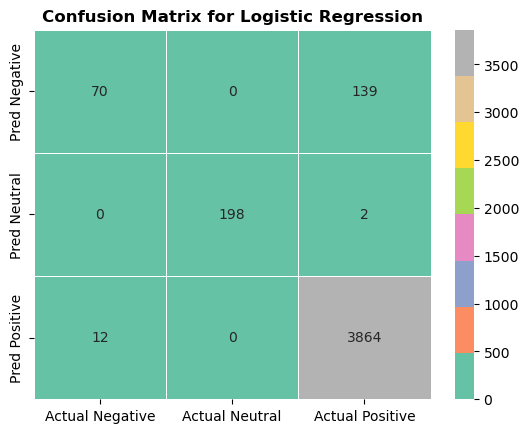

In [131]:
sns.heatmap(matrix,annot=True,fmt='d',xticklabels=['Actual Negative','Actual Neutral','Actual Positive'],
            yticklabels=['Pred Negative','Pred Neutral','Pred Positive'],cmap='Set2',linecolor='white',linewidths=0.5)
plt.title('Confusion Matrix for Logistic Regression',weight='bold')
plt.show()


In [132]:
report=classification_report(y_test,y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.85      0.33      0.48       209
           1       1.00      0.99      0.99       200
           2       0.96      1.00      0.98      3876

    accuracy                           0.96      4285
   macro avg       0.94      0.77      0.82      4285
weighted avg       0.96      0.96      0.96      4285



In [133]:
logistic_precesion_score=precision_score(y_test,y_pred,average='weighted')
logistic_precesion_score

0.9610166177783078

In [134]:
logistic_recall_score=recall_score(y_test,y_pred,average='weighted')
logistic_recall_score

0.9642940490081681

## 7.2. SVM Model 

In [135]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [136]:
svm_model=SVC(kernel='rbf')

In [137]:
#params_grid={'kernel':['rbf','linear','poly']}

In [138]:
#grid_search=GridSearchCV(estimator=svm_model,param_grid=params_grid,cv=5)

In [139]:
#grid_search.fit(tfidf_xtrain,y_train)

In [140]:
svm_model.fit(x_train,y_train)

SVC()

In [141]:
svm_pred=svm_model.predict(x_test)

In [142]:
svm_score=accuracy_score(y_test,svm_pred)
svm_score

0.9600933488914819

In [143]:
svm_matrix=confusion_matrix(y_test,svm_pred)

Text(0.5, 1.0, 'Confusion Matrix for SVM Model')

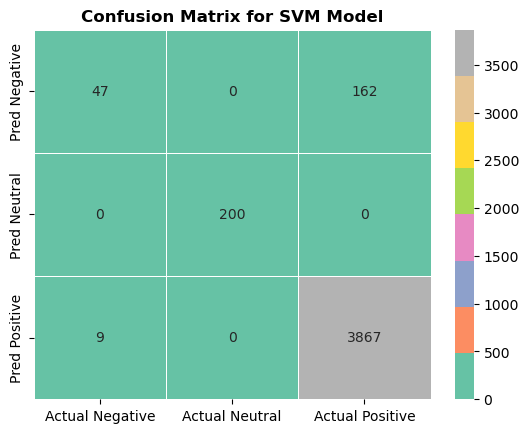

In [144]:
sns.heatmap(svm_matrix,annot=True,fmt='d',xticklabels=['Actual Negative','Actual Neutral','Actual Positive'],
            yticklabels=['Pred Negative','Pred Neutral','Pred Positive'],cmap='Set2',linecolor='white',
            linewidths=0.5)
plt.title('Confusion Matrix for SVM Model',weight='bold')


In [145]:
report=classification_report(y_test,svm_pred)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.22      0.35       209
           1       1.00      1.00      1.00       200
           2       0.96      1.00      0.98      3876

    accuracy                           0.96      4285
   macro avg       0.93      0.74      0.78      4285
weighted avg       0.96      0.96      0.95      4285



In [146]:
svm_precesion_score=precision_score(y_test,svm_pred,average='weighted')
svm_precesion_score

0.9557905748004414

In [147]:
svm_recall_score=recall_score(y_test,svm_pred,average='weighted')
svm_recall_score

0.9600933488914819

## 7.3. Naive Bayes Model

In [148]:
from sklearn.naive_bayes import MultinomialNB 

In [149]:
naive_model=MultinomialNB()

In [150]:
naive_model.fit(x_train,y_train)

MultinomialNB()

In [151]:
naive_pred=naive_model.predict(x_test)

In [152]:
naive_score=accuracy_score(y_test,naive_pred)
naive_score

0.938389731621937

In [153]:
naive_matrix=confusion_matrix(y_test,naive_pred)

Text(0.5, 1.0, 'Confusion Matrix for Naive Bayes Model')

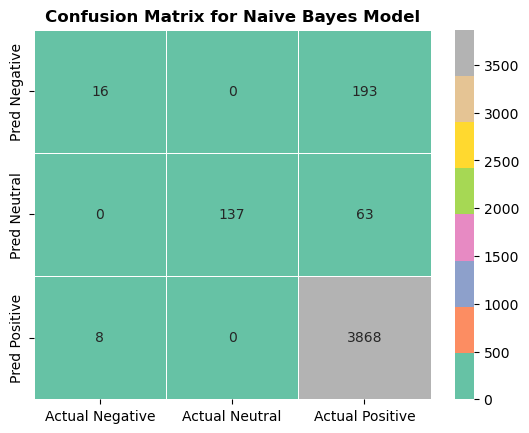

In [154]:
sns.heatmap(naive_matrix,annot=True,fmt='d',xticklabels=['Actual Negative','Actual Neutral','Actual Positive'],
            yticklabels=['Pred Negative','Pred Neutral','Pred Positive'],cmap='Set2',linecolor='white',linewidths=0.5)
plt.title('Confusion Matrix for Naive Bayes Model',weight='bold')

In [155]:
report=classification_report(y_test,naive_pred)
print(report)

              precision    recall  f1-score   support

           0       0.67      0.08      0.14       209
           1       1.00      0.69      0.81       200
           2       0.94      1.00      0.97      3876

    accuracy                           0.94      4285
   macro avg       0.87      0.59      0.64      4285
weighted avg       0.93      0.94      0.92      4285



In [156]:
naive_precesion_score=precision_score(y_test,naive_pred,average='weighted')
naive_precesion_score


0.9275911541890239

In [157]:
naive_recall_score=recall_score(y_test,naive_pred,average='weighted')
naive_recall_score

0.938389731621937

## 7.4. Decision Tree

In [158]:
decision_tree_classifier=DecisionTreeClassifier(criterion='entropy',max_features=3000,max_depth=4)

In [159]:
decision_tree_classifier=decision_tree_classifier.fit(x_train,y_train)

In [160]:
decisiontree_pred=decision_tree_classifier.predict(x_test)

In [161]:
decisiontree_accuracy=accuracy_score(y_test,decisiontree_pred)
decisiontree_accuracy

0.9185530921820303

In [162]:
decisiontree_matrix=confusion_matrix(y_test,decisiontree_pred)

Text(0.5, 1.0, 'Confusion Matrix for Decision Tree Model')

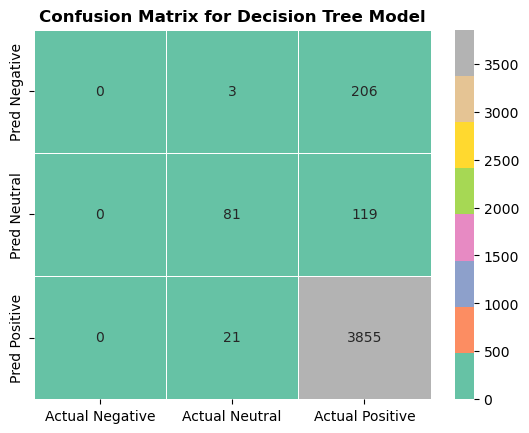

In [163]:
sns.heatmap(decisiontree_matrix,annot=True,fmt='d',xticklabels=['Actual Negative','Actual Neutral','Actual Positive'],
            yticklabels=['Pred Negative','Pred Neutral','Pred Positive'],cmap='Set2',linecolor='white',linewidths=0.5)
plt.title('Confusion Matrix for Decision Tree Model',weight='bold')


In [164]:
decisiontree_precesion=precision_score(y_test,decisiontree_pred,average='weighted')
decisiontree_precesion

0.87022685599115

In [165]:
decisiontree_recall=recall_score(y_test,decisiontree_pred,average='weighted')
print(decisiontree_recall)

0.9185530921820303


In [166]:
deciontree_report=classification_report(y_test,decisiontree_pred)
print(deciontree_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       209
           1       0.77      0.41      0.53       200
           2       0.92      0.99      0.96      3876

    accuracy                           0.92      4285
   macro avg       0.56      0.47      0.50      4285
weighted avg       0.87      0.92      0.89      4285



## 7.5. XGBoost

In [167]:
import xgboost as xgb

In [168]:
xg_clf = xgb.XGBClassifier(n_estimators=100, max_depth=7,booster='dart' ,learning_rate=0.01)

In [169]:
xg_clf.fit(x_train,y_train)     

XGBClassifier(base_score=None, booster='dart', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [170]:
xg_pred = xg_clf.predict(x_test)

Text(0.5, 1.0, 'Confusion Matrix for Decision Tree Model')

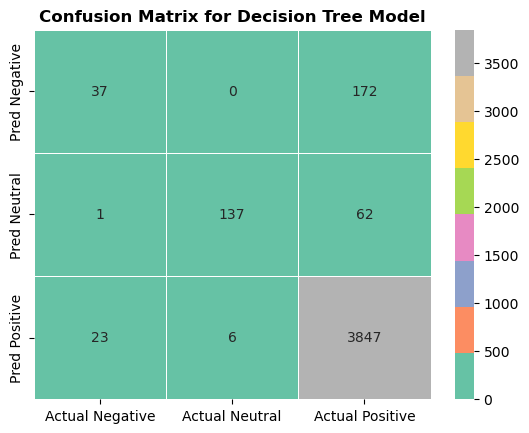

In [171]:
xgb_matrix = confusion_matrix(y_test,xg_pred)
sns.heatmap(xgb_matrix,annot=True,fmt='d',xticklabels=['Actual Negative','Actual Neutral','Actual Positive'],
            yticklabels=['Pred Negative','Pred Neutral','Pred Positive'],cmap='Set2',linecolor='white',linewidths=0.5)
plt.title('Confusion Matrix for Decision Tree Model',weight='bold')

In [172]:
xgb_precesion=precision_score(y_test,xg_pred,average='weighted')
xgb_precesion

0.926985613851767

In [173]:
xgb_recall=precision_score(y_test,xg_pred,average='weighted')
xgb_recall

0.926985613851767

In [174]:
xgb_report=classification_report(y_test,xg_pred)
print(xgb_report)

              precision    recall  f1-score   support

           0       0.61      0.18      0.27       209
           1       0.96      0.69      0.80       200
           2       0.94      0.99      0.97      3876

    accuracy                           0.94      4285
   macro avg       0.84      0.62      0.68      4285
weighted avg       0.93      0.94      0.93      4285



## 7.6. LGBMlight

In [175]:
import lightgbm as lgb

In [176]:
lgb_clf = lgb.LGBMClassifier(boosting_type='dart', n_estimators=100, max_depth=7, n_jobs=-1)

In [177]:
lgb_clf.fit(x_train, y_train)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.417821 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 339678
[LightGBM] [Info] Number of data points in the train set: 17139, number of used features: 5000
[LightGBM] [Info] Start training from score -3.021680
[LightGBM] [Info] Start training from score -3.064500
[LightGBM] [Info] Start training from score -0.100259
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

LGBMClassifier(boosting_type='dart', max_depth=7, n_jobs=-1)

In [178]:
lgb_pred = lgb_clf.predict(x_test)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


Text(0.5, 1.0, 'Confusion Matrix for Decision Tree Model')

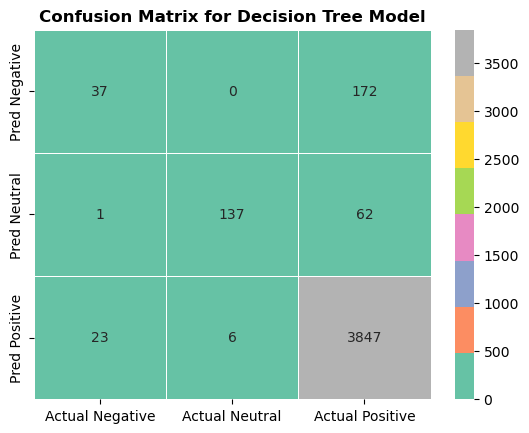

In [179]:
lgbm_matrix = confusion_matrix(y_test,lgb_pred)
sns.heatmap(xgb_matrix,annot=True,fmt='d',xticklabels=['Actual Negative','Actual Neutral','Actual Positive'],
            yticklabels=['Pred Negative','Pred Neutral','Pred Positive'],cmap='Set2',linecolor='white',linewidths=0.5)
plt.title('Confusion Matrix for Decision Tree Model',weight='bold')

In [180]:
lgb_precesion=precision_score(y_test,lgb_pred,average='weighted')
lgb_precesion

0.9559297824143224

In [181]:
lgb_recall=recall_score(y_test,lgb_pred,average='weighted')
lgb_recall

0.961026837806301

In [182]:
lgb_report=classification_report(y_test,lgb_pred)
print(lgb_report)

              precision    recall  f1-score   support

           0       0.78      0.33      0.46       209
           1       1.00      0.96      0.98       200
           2       0.96      1.00      0.98      3876

    accuracy                           0.96      4285
   macro avg       0.91      0.76      0.81      4285
weighted avg       0.96      0.96      0.95      4285



# 8. Model Selection

## Accuracy scores for all models

In [183]:
df_scores=pd.DataFrame({'Model':['Logistic','SVM(RBF)','Naive Bayes','Decision Tree', 'XGBClassifier', 'LGBMClassifier'],
                        'Precesion Scores':[logistic_precesion_score,svm_precesion_score,naive_precesion_score,decisiontree_precesion, xgb_precesion, lgb_precesion],
                        'Recall': [logistic_recall_score,svm_recall_score,naive_recall_score,decisiontree_recall, xgb_recall, lgb_recall]})
df_scores.sort_values(by='Precesion Scores',ascending=False)

,Model,Precesion Scores,Recall
0,Logistic,0.961017,0.964294
5,LGBMClassifier,0.955930,0.961027
1,SVM(RBF),0.955791,0.960093
2,Naive Bayes,0.927591,0.938390
4,XGBClassifier,0.926986,0.926986
3,Decision Tree,0.870227,0.918553


In [184]:
df_scores.sort_values(by='Recall',ascending=False)

,Model,Precesion Scores,Recall
0,Logistic,0.961017,0.964294
5,LGBMClassifier,0.955930,0.961027
1,SVM(RBF),0.955791,0.960093
2,Naive Bayes,0.927591,0.938390
4,XGBClassifier,0.926986,0.926986
3,Decision Tree,0.870227,0.918553


# 9. Final Model 

## Lightgbm

In [185]:
import pickle

In [189]:
pickle.dump(lgb_clf, open('Final_model.pkl', 'wb'))

In [190]:
tfidf = pickle.load(open('tfidf.pkl','rb'))

In [191]:
model = pickle.load(open('Final_model.pkl','rb'))

In [192]:
cleaned_input = 'horribl custom servic hotel stay februari rd th friend pick hotel monaco appeal websit onlin packag includ champagn late checkout free valet gift spa weekend friend check room hour earlier came later pull valet young man stood ask valet open said pull bag offer help got garment bag suitcas came car key room number say valet car park car street pull left key work ask valet park car get went room fine bottl champagn oil lotion gift spa dress went came got bed notic blood drop pillow sheet pillow disgust unbeliev call desk sent somebodi minut later swap sheet left apolog sunday morn call desk speak manag sheet aggrav rude appar manag kind supervisor weekend wait monday morn young man spoke said cover food ad person chang sheet said fresh blood rude tone checkout pm packag book staff maid tri walk room open door apolog close peopl call say check remind packag final pack thing went downstair check quickli sign paper took way took closer look room unfortun cover food offer charg valet call desk ask charg ladi answer snap say awar problem experienc monday like told earlier life treat like hotel sure hotel constantli problem lucki one stay recommend anybodi know'

In [193]:
inp = tfidf.transform(pd.Series(cleaned_input)).toarray()

In [194]:
model.predict(inp)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


array([2])

In [195]:
df = pickle.load(open('df_matrix.pkl', 'rb'))

In [196]:
df.head()

,able,able check,able walk,absolute,absolutely,absolutely beautiful,absolutely loved,absolutely wonderful,ac,accept,...,young child,younger,youçéèe,youçéêl,yr,yr old,yummy,zero,zone,zoo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.06897,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.089211,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [197]:
tweets.sample(15)

,Review,Rating,TypeofRating,cleaned_reviews,word_count,vadar_sentiment,vadar_sentiment_transform
6154,"not clean just came 7-day stay sky court, loca...",2,Bad,clean came day stay sky court location hotel g...,53,Positive,2
11075,resort perspective just spent nights rincon be...,4,Good,resort perspective spent night rincon beach re...,387,Positive,2
14804,"place worst, not believe good reviews place, b...",1,Bad,place worst believe good review place booked b...,39,Negative,0
2013,dirty dingy visited march 2004 nights having b...,1,Bad,dirty dingy visited march night booked online ...,61,Negative,0
2328,fabulous stay stayed w 4 nights late amazing t...,4,Good,fabulous stay stayed w night late amazing time...,92,Positive,2
4535,elegant hotel beautiful madrid westin palace l...,5,Good,elegant hotel beautiful madrid westin palace l...,114,Positive,2
16892,"success using tripadvisor, visitor tokyo years...",5,Good,success using tripadvisor visitor tokyo year w...,55,Positive,2
18734,loved residence michelangiolo stayed residence...,5,Good,loved residence michelangiolo stayed residence...,83,Positive,2
17677,"frightened praise mean not booking future, rev...",5,Good,frightened praise mean booking future review g...,120,Positive,2
5715,fantastic invited barcelona supplier exhibitio...,5,Good,fantastic invited barcelona supplier exhibitio...,89,Positive,2


In [198]:
tweets.iloc[14494:14495, 3:4].values

array([['excellent room great location great location easy cityhotel room standard double bed perfect huge bed usual tv bath bidet perfect cooling cava bottle hairdryer offered upgrade didnt rd floor st floor room view wasnt great mst day didnt matter view rd floor amazing didnt eat student budget breakfast room bought previously thing supermarket hotelwe used spa facility definitly recommend quite quiet went round pm clean real pool wouldnt recommend hotel family small child swimming pool necessity small heated pool spa area nice relax instaff reasonably nice agree previous review lack character slightly cold buissiness professional day okwe ordered food room service little dear food nice service excellent wellto sum excellent hotel recommend couple buissness menwomen relaxing weekendonly annoying thing noise builder outside soon ended']],
      dtype=object)